In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/supermarket_sales.csv')
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
le=LabelEncoder()

In [ ]:
list_1=list(data.columns)

In [ ]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)

In [ ]:
for i in list_cate:
    data[i]=le.fit_transform(data[i])

In [ ]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,26,146,2,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,87,23,0,76.40,4.761905,3.8200,9.6
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,81,155,1,324.31,4.761905,16.2155,7.4
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,19,485,2,465.76,4.761905,23.2880,8.4
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,57,29,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,153,2,1,1,1,3,40.35,1,2.0175,42.3675,21,174,2,40.35,4.761905,2.0175,6.2
996,250,1,0,1,0,4,97.38,10,48.6900,1022.4900,70,342,2,973.80,4.761905,48.6900,4.4
997,767,0,2,0,1,2,31.84,1,1.5920,33.4320,58,154,0,31.84,4.761905,1.5920,7.7
998,308,0,2,1,1,4,65.82,1,3.2910,69.1110,45,261,0,65.82,4.761905,3.2910,4.1


In [ ]:
data.corr()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,1.000000,-0.041753,0.031247,0.070519,0.023552,0.027589,-0.009213,0.024977,0.027277,0.027277,-0.025614,0.009224,0.021478,0.027277,NaN,0.027277,-0.003787
Branch,-0.041753,1.000000,-0.507401,-0.019608,-0.056318,-0.053938,0.028202,0.015964,0.041047,0.041047,-0.025768,0.035921,-0.050104,0.041047,NaN,0.041047,0.010238
City,0.031247,-0.507401,1.000000,0.004899,0.012219,0.008811,-0.013763,-0.002121,-0.012812,-0.012812,0.002043,-0.066115,0.019094,-0.012812,NaN,-0.012812,0.049585
Customer type,0.070519,-0.019608,0.004899,1.000000,0.039996,-0.036800,-0.020238,-0.016763,-0.019670,-0.019670,-0.000419,-0.020162,0.018073,-0.019670,NaN,-0.019670,0.018889
Gender,0.023552,-0.056318,0.012219,0.039996,1.000000,0.005193,0.015445,-0.074258,-0.049451,-0.049451,0.021450,0.085054,0.044578,-0.049451,NaN,-0.049451,0.004800
Product line,0.027589,-0.053938,0.008811,-0.036800,0.005193,1.000000,0.019321,0.020256,0.031621,0.031621,-0.032970,-0.058607,0.029896,0.031621,NaN,0.031621,-0.020529
Unit price,-0.009213,0.028202,-0.013763,-0.020238,0.015445,0.019321,1.000000,0.010778,0.633962,0.633962,-0.033470,0.008155,-0.015941,0.633962,NaN,0.633962,-0.008778
Quantity,0.024977,0.015964,-0.002121,-0.016763,-0.074258,0.020256,0.010778,1.000000,0.705510,0.705510,-0.013842,-0.009045,-0.003921,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.027277,0.041047,-0.012812,-0.019670,-0.049451,0.031621,0.633962,0.705510,1.000000,1.000000,-0.025537,-0.005298,-0.012434,1.000000,NaN,1.000000,-0.036442
Total,0.027277,0.041047,-0.012812,-0.019670,-0.049451,0.031621,0.633962,0.705510,1.000000,1.000000,-0.025537,-0.005298,-0.012434,1.000000,NaN,1.000000,-0.036442


<Axes: >

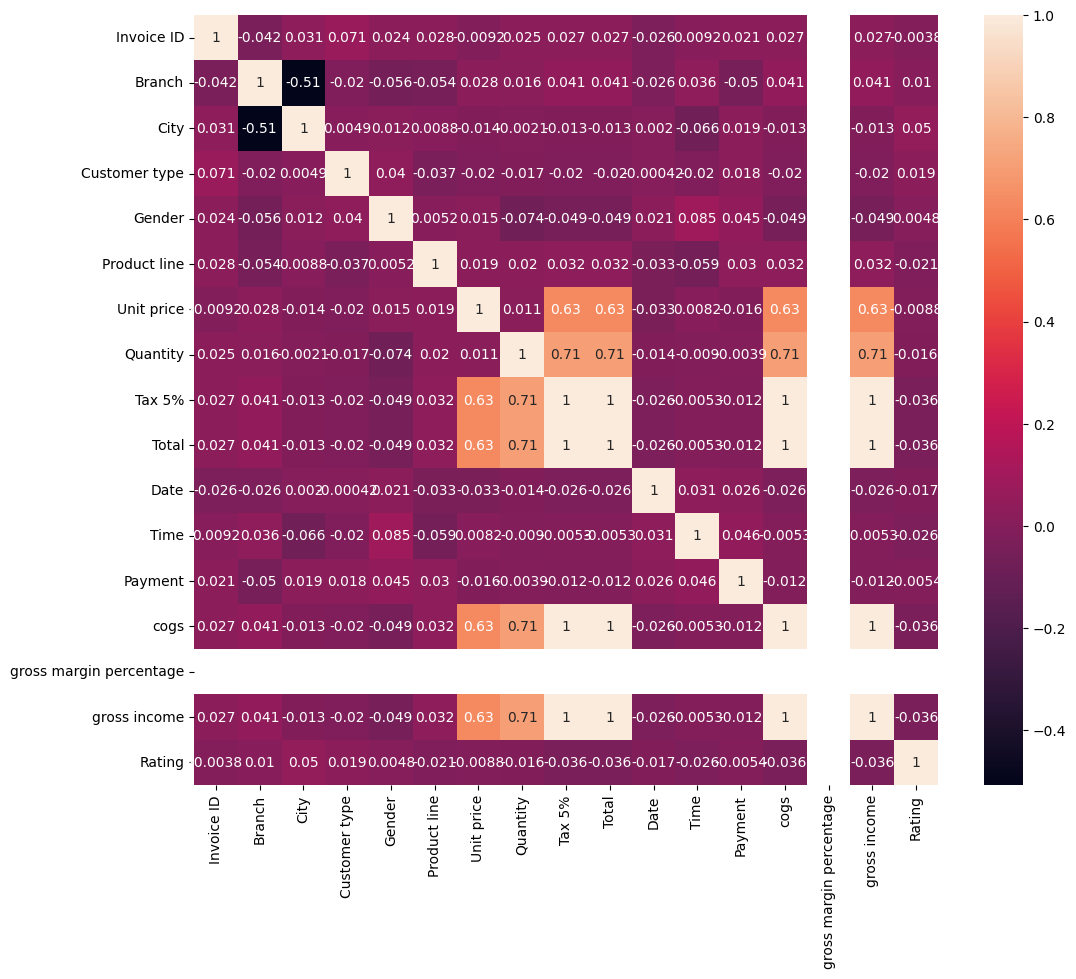

In [ ]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)

In [ ]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

X = numeric_data.drop(columns=['Total'])
y = numeric_data['Total']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Feature Selection
selector = SelectFromModel(estimator=RandomForestRegressor()).fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
models = {
    'RandomForestRegressor': (RandomForestRegressor(), {
        'max_depth': [15, 20, 25, 30],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [100, 200, 300],
        'max_features': ['auto', 'sqrt', 'log2']  # Added max_features for regularization
    })}


from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV, cross_val_score
from sklearn.metrics import make_scorer

scoring_metrics = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'R2': make_scorer(r2_score)
}
num_folds = 5
# Perform k-fold cross-validation for each model
results = {}
for model_name, (model, param_grid) in models.items():
    print(f"Evaluating {model_name}...")
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    scores = {}
    for metric_name, metric_func in scoring_metrics.items():
        metric_scores = cross_val_score(best_model, X, y, cv=kfold, scoring=scoring_metrics["MAE"])
        scores[metric_name] = metric_scores
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': -grid_search.best_score_,
        'best_model': best_model,
        'scores': scores
    }

# Print the results
for model_name, result in results.items():
    print(f"Results for {model_name}:")
    print(f"Best parameters: {result['best_params']}")
    print(f"Best negative MSE score: {result['best_score']}")
    print("Evaluation metrics:")
    for metric_name, metric_scores in result['scores'].items():
        print(f"{metric_name}: {np.mean(metric_scores)} (±{np.std(metric_scores)})")

Evaluating RandomForestRegressor...
Results for RandomForestRegressor:
Best parameters: {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best negative MSE score: 2.444165170599832
Evaluation metrics:
MAE: 0.8348419799999942 (±0.06221023287927116)
MSE: 0.8244003599999893 (±0.08502515278765106)
R2: 0.8294978299999928 (±0.06563568220265346)


In [ ]:
z

In [ ]:
m